<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request


url = 'https://dapi.kakao.com/v3/search/book' #OpenAPI 서비스 제공URL
target_param = "target=title" #전달 인자
page_param = "page=2"         #전달 인자
query_in = input("검색 질의:")
query_param = "query="+urllib.parse.quote(query_in) #utf-8로 인코딩, 전달인자

query_str = url+'?'+target_param+'&'+query_param+'&'+page_param #쿼리문자열

print(query_str)

request = urllib.request.Request(query_str) #서비스 요청에 사용할 개체를 생성
request.add_header("Authorization", "KakaoAK PersonaoKEY") #자신이 발급받은 키로 수정
response = urllib.request.urlopen(request) #웹 서버에 요청
res = response.read().decode('utf-8')
print(res)

In [2]:
import json
jd = json.loads(res)
print(jd)

NameError: ignored

In [3]:
import pandas as pd
df = pd.json_normalize(jd['documents'])
df.info()

NameError: ignored

In [4]:
url = 'https://openapi.naver.com/v1/search/book.xml'

query_in =input("검색 질의 : ") #사용자로부터 입력받은 것
query_param = "query="+urllib.parse.quote(query_in) #utf-8로 인코딩 #쿼리부분에 대한 param완성
query_str = url+'?'+query_param

print(query_str)

request = urllib.request.Request(query_str) #서비스 요청에 사용할 개체를 생성
request.add_header('X-Naver-Client-Id', 'PersonaoKEY')
request.add_header('X-Naver-Client-Secret', 'PersonaoKEY')
#request.add_header('X-Naver-Client-Id', '발급받은 client id')
#request.add_header('X-Naver-Client-Secret', '발급받은 client secret')

response = urllib.request.urlopen(request)
res = response.read().decode("utf-8")
print(res)

검색 질의 : 파이썬
https://openapi.naver.com/v1/search/book.xml?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC
<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - book ::'파이썬'</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Thu, 03 Mar 2022 10:26:47 +0900</lastBuildDate><total>1509</total><start>1</start><display>10</display><item><title>혼자 공부하는 &lt;b&gt;파이썬&lt;/b&gt; (&lt;b&gt;파이썬&lt;/b&gt; 최신 버전 반영)</title><link>http://book.naver.com/bookdb/book_detail.php?bid=15028688</link><image>https://bookthumb-phinf.pstatic.net/cover/150/286/15028688.jpg?type=m1&amp;udate=20220129</image><author>윤인성</author><price>18000</price><discount>16200</discount><publisher>한빛미디어</publisher><pubdate>20190610</pubdate><isbn>1162241888 9791162241882</isbn><description>1:1 과외하듯 배우는 &lt;b&gt;파이썬&lt;/b&gt; 프로그래밍 자습서(&lt;b&gt;파이썬&lt;/b&gt; 최신 버전 반영)
27명의 베타리더 검증으로, ‘함께 만든’ 입문자 맞춤형 도서

이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 &lt;b&gt;파이썬&lt;

In [5]:
df = pd.read_xml(res,xpath=".//item")
df

,title,link,image,author,price,discount,publisher,pubdate,isbn,description
0,혼자 공부하는 <b>파이썬</b> (<b>파이썬</b> 최신 버전 반영),http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/150/...,윤인성,18000,16200,한빛미디어,20190610,1162241888 9791162241882,1:1 과외하듯 배우는 <b>파이썬</b> 프로그래밍 자습서(<b>파이썬</b> 최...
1,혼자 공부하는 첫 프로그래밍 with <b>파이썬</b> (1:1 과외하듯 배우는 ...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/163/...,문현일,17000,15300,한빛미디어,20200630,1162243031 9791162243039,비전공자도 ‘혼공’ 할 수 있다!\n1:1 과외하듯 배우는 왕초보 코딩 입문서\n\...
2,Do it! 점프 투 <b>파이썬</b>,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/150/...,박응용,18800,16900,이지스퍼블리싱,20190620,1163030910 9791163030911,<b>파이썬</b> 4년 연속 베스트셀러 1위!\n《DO IT! 점프 투 <b>파이...
3,이것이 취업을 위한 코딩 테스트다 with <b>파이썬</b> (취업과 이직을 결정...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/164/...,나동빈,34000,30600,한빛미디어,20200805,1162243074 9791162243077,"8가지 핵심 알고리즘 이론을 쉽게 설명하고, 관련 실전 문제를 풀이했다. 출제 유형..."
4,<b>파이썬</b> 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 ...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/164/...,박상길,38000,34200,책만,20200715,1189909170 9791189909178,"물론, <b>파이썬</b>으로 구현하는 코드 풀이를 통해 성능 최적화 기법, <b>..."
5,모두의 <b>파이썬</b> (20일 만에 배우는 프로그래밍 기초),http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/141/...,이승찬,12000,10800,길벗,20181009,1160505853 9791160505856,<b>파이썬</b> 분야 & 어린이 코딩 교육 분야\n2년 연속 베스트셀러! 개정판...
6,웹 크롤링 & 데이터 분석 with <b>파이썬</b>,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/214/...,장철원,20000,18000,인사이트,20220124,8966263399 9788966263394,그동안 <b>파이썬</b>이라는 언어와 크롤링의 난해한 코드로 고개를 떨구던 독자에...
7,<b>파이썬</b>을 이용한 비트코인 자동매매,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/182/...,유대표|조대표,27000,24300,파이스탁,20210322,1196608814 9791196608811,이 책은 최근 인기 있는 프로그래밍 언어인 <b>파이썬</b>을 사용하여 국내 3대...
8,<b>파이썬</b> 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/162/...,권철민,38000,34200,위키북스,20200207,1158391927 9791158391928,자세한 이론 설명과 <b>파이썬</b> 실습을 통해 머신러닝을 완벽하게 배울 수 있...
9,"쉽게 따라 만드는 <b>파이썬</b> 주식 자동매매 시스템 (증권사 API 사용, ...",http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/211/...,박준성,28000,25200,길벗,20211014,1165217163 9791165217167,개발 환경 구축부터 실전 투자 전환까지\n<b>파이썬</b>으로 나만의 주식 자동매...


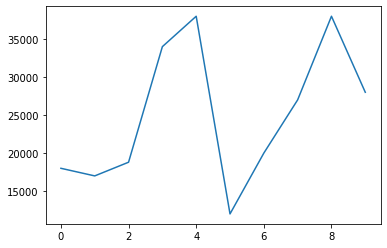

In [9]:
import matplotlib.pyplot as plt
df.price.plot()
plt.show()

In [8]:
df.description[0]

'1:1 과외하듯 배우는 <b>파이썬</b> 프로그래밍 자습서(<b>파이썬</b> 최신 버전 반영)\n27명의 베타리더 검증으로, ‘함께 만든’ 입문자 맞춤형 도서\n\n이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 <b>파이썬</b>을 배우려는 입문자가 ‘꼭 필요한 내용을 제대로’ 학습할 수 있도록 구성했다. ‘무엇을’...'

In [7]:
des_str = df.description[0]
des_str

'1:1 과외하듯 배우는 <b>파이썬</b> 프로그래밍 자습서(<b>파이썬</b> 최신 버전 반영)\n27명의 베타리더 검증으로, ‘함께 만든’ 입문자 맞춤형 도서\n\n이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 <b>파이썬</b>을 배우려는 입문자가 ‘꼭 필요한 내용을 제대로’ 학습할 수 있도록 구성했다. ‘무엇을’...'

In [6]:
demo_str = "abc 123 cae$ asd# cr"
target_str = ""
for ch in demo_str:
  if ch.isalnum() or ch.isspace():
    target_str = target_str+ch
    print(target_str)

a
ab
abc
abc 
abc 1
abc 12
abc 123
abc 123 
abc 123 c
abc 123 ca
abc 123 cae
abc 123 cae 
abc 123 cae a
abc 123 cae as
abc 123 cae asd
abc 123 cae asd 
abc 123 cae asd c
abc 123 cae asd cr


In [10]:
demo_str = "abc 123 cae$ asd# cr"
target_str = ""
for ch in demo_str:
  if ch.isalnum() or ch.isspace():
    target_str = target_str+ch
print(target_str)
target_str = "".join(char for char in demo_str if (char.isalnum() or char.isspace()))
print(target_str)

abc 123 cae asd cr
abc 123 cae asd cr


In [11]:
filter_str = "".join(char for char in des_str if (char.isalnum() or char.isspace()) and char != '•')
print(filter_str)
'•'.isalnum()

11 과외하듯 배우는 b파이썬b 프로그래밍 자습서b파이썬b 최신 버전 반영
27명의 베타리더 검증으로 함께 만든 입문자 맞춤형 도서

이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가 혹은 b파이썬b을 배우려는 입문자가 꼭 필요한 내용을 제대로 학습할 수 있도록 구성했다 무엇을


False

In [12]:
filter_str = "".join(char for char in des_str if (char.isalnum() or char.isspace()) and char != '•')
print(filter_str)
words = filter_str.split(' ')
s = pd.Series(words)
s.value_counts()

11 과외하듯 배우는 b파이썬b 프로그래밍 자습서b파이썬b 최신 버전 반영
27명의 베타리더 검증으로 함께 만든 입문자 맞춤형 도서

이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가 혹은 b파이썬b을 배우려는 입문자가 꼭 필요한 내용을 제대로 학습할 수 있도록 구성했다 무엇을


배우려는        2
프로그래밍       2
입문자가        2
11          1
필요한         1
처음          1
혹은          1
b파이썬b을      1
꼭           1
내용을         1
독학으로        1
제대로         1
학습할         1
수           1
있도록         1
구성했다        1
언어를         1
책은          1
과외하듯        1
도서\n\n이     1
맞춤형         1
입문자         1
만든          1
함께          1
검증으로        1
베타리더        1
반영\n27명의    1
버전          1
최신          1
자습서b파이썬b    1
b파이썬b       1
배우는         1
무엇을         1
dtype: int64

In [13]:
from  wordcloud import WordCloud

In [14]:
src = """
      python interpreter language python python feature love is
      wonderful python interpreter language all language is hard
"""

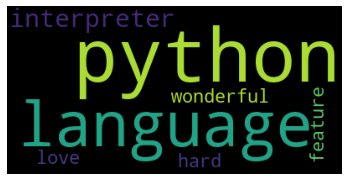

{'feature': 0.25,
 'hard': 0.25,
 'interpreter': 0.5,
 'language': 0.75,
 'love': 0.25,
 'python': 1.0,
 'wonderful': 0.25}

In [15]:
wc = WordCloud()
wc.generate(src)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_ #빈도수가 가장 많은 걸 1

In [16]:
#리눅스 명령 sudo
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,506 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

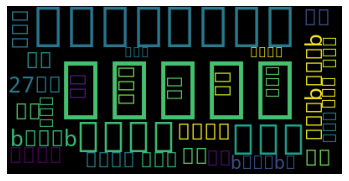

{'27명의': 0.5,
 'b파이썬b': 0.5,
 'b파이썬b을': 0.5,
 '검증으로': 0.5,
 '과외하듯': 0.5,
 '구성했다': 0.5,
 '내용을': 0.5,
 '도서': 0.5,
 '독학으로': 0.5,
 '만든': 0.5,
 '맞춤형': 0.5,
 '무엇을': 0.5,
 '반영': 0.5,
 '배우는': 0.5,
 '배우려는': 1.0,
 '버전': 0.5,
 '베타리더': 0.5,
 '언어를': 0.5,
 '입문자': 0.5,
 '입문자가': 1.0,
 '있도록': 0.5,
 '자습서b파이썬b': 0.5,
 '제대로': 0.5,
 '책은': 0.5,
 '처음': 0.5,
 '최신': 0.5,
 '프로그래밍': 1.0,
 '필요한': 0.5,
 '학습할': 0.5,
 '함께': 0.5,
 '혹은': 0.5}

In [18]:
wc = WordCloud()
wc.generate(filter_str)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_ #빈도수가 가장 많은 걸 1

In [19]:
import matplotlib.font_manager as font_manager
sf = fm.findSystemFonts()
[f for f in sf if 'Nanum' in f]

NameError: ignored